In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Zadanie 1 
##### WSI-24L-G104
Celem zadanie jest implementacja metody gradientu prostego dla dwóch funkcji:
- Funkcja Himmelblau:
    $$ f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2 $$ 
- Funckcja Ackleya w wersji dwuwymiarowej:
    $$ f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2+y^2)})-\exp(0.5(\cos2\pi x+\cos2\pi y))+20+e $$


## Opis działania metody
Metoda gradientu prostego polega na znalezieniu, w iteracyjny sposób, ekstremum lokalnego funkcji. W tym przypadku szukamy minimum dla funkcji dwóch zmiennych o postaci $z = f(x,y)$.
Gradient funkcji, $\nabla f(\mathbf{x_P})$ wskazuje kierunek w którym funckja rośnie najszybciej względem punktu $\mathbf{x_P}$, wynika więc, że w przeciwnym kierunku funckja będzie malała najszybciej. Możemy, więc przesunąć punkt $\mathbf{x_P}$  w kierunku najszybszego spadku i powtórzyć proces. Znaczenie na jeszcze długość czynionego kroku, jeśli okazałby się za duży, solver mógłby przeskoczyć za szukane ekstremum i zacząć uciekać do nieskończoności. Oczywiście krok nie powinien być za mały, ponieważ szukanie ekstremum zajęło by za długo. Wzór iteracyjny, wygląda następująco:
$$ \mathbf{x_t+1} = \mathbf{x_t} - \beta_t \nabla f(\mathbf{x_t}) $$
Oznacza to, że przed przystąpieniem do wyznaczenia ekstremum należy podać jakiś punkt początkowy $\mathbf{x_0}$, przy okazji można ograniczyć czas obliczeń podając odgórnie liczbę kroków do wykonania.

In [3]:
def gradient_descent(func,grad_func,start_pos,steps,beta):
    position = start_pos
    func_value = [(0,func(*position))]
    trace = [position]
    def calculate_new_position():
        grad_value = grad_func(position[0],position[1])
        e1 = position[0]-beta*grad_value[0]
        e2 = position[1]-beta*grad_value[1]
        return (e1,e2)
    for i in range(1,steps+1):
        position=calculate_new_position()
        func_value.append((i,func(*position)))
        trace.append(position)
    return trace,func_value

def plot_function(func, trace=[]):
    X = np.arange(-4.5, 4.5, 0.1)
    Y = np.arange(-4.5,4.5, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = func(X,Y)
    plt.contourf(X,Y,Z,90,cmap="jet")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.title(func.__name__.replace("_"," "))
    if len(trace):
        trace_x,trace_y = list(zip(*trace))
        plt.plot(trace_x,trace_y,color="red")
    plt.show()

def print_values(trace,values):
    trace_x,trace_y = list(zip(*trace))
    steps,value = list(zip(*values))
    for i in range(len(steps)):
        print(f"Step {steps[i]:<3}\t Current position ({trace_x[i]:.4e}\t {trace_y[i]:.4e})\t value at position {value[i]:<.4e}.")

def plot_values(values):
    steps,value = list(zip(*values))
    plt.plot(steps,value)
    plt.xlabel("step")
    plt.ylabel("function value")
    plt.grid()
    plt.show()     



## Funkcja Himmelblau
Funkcja ta ma postać:
$$ f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2 $$ 
oraz jej gradient:
$$\nabla f(x,y)=
\begin{bmatrix}
2 (2 x (x^2 + y - 11) + x + y^2 - 7)
\\2 (x^2 + 2 y (x + y^2 - 7) + y - 11)
\end{bmatrix}$$
Z analizy funkcji wynika, że posiada ona cztery minima lokalne, wsystkie o wartości 0.

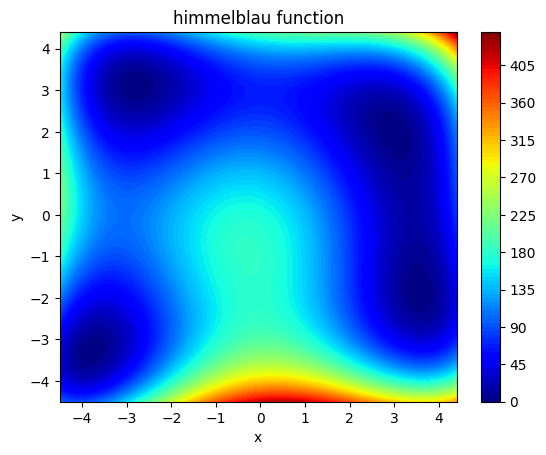

In [4]:
def himmelblau_function(x,y):
    elem1 = (x**2 + y - 11)**2 
    elem2 = (x + y**2 - 7)**2
    return elem1+elem2

def himmelblau_funnction_gradient(x,y):
    dx = 2*(2*x*(x**2+y-11)+x+y**2-7)
    dy = 2*(x**2+2*y*(x+y**2-7)+y-11)
    return (dx,dy)

plot_function(himmelblau_function)

### Test 1, różny parametr $\beta_t$

#### Punkt $(0,0)$

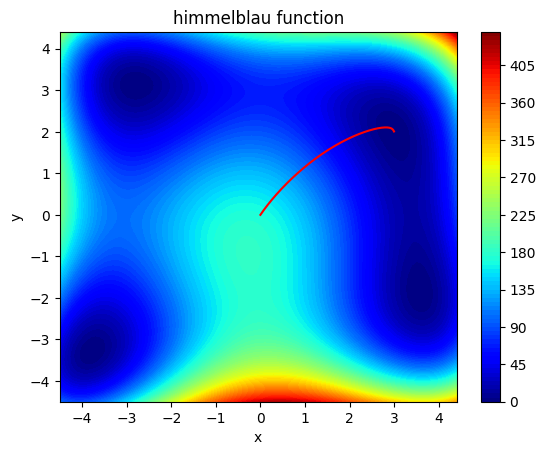

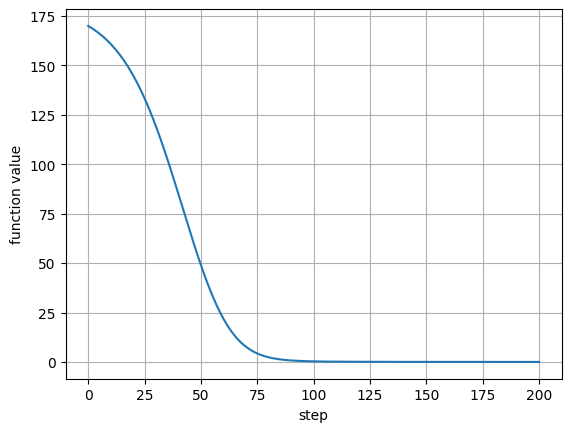

In [5]:
beta3 = 0.001
start_position = (0,0)
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

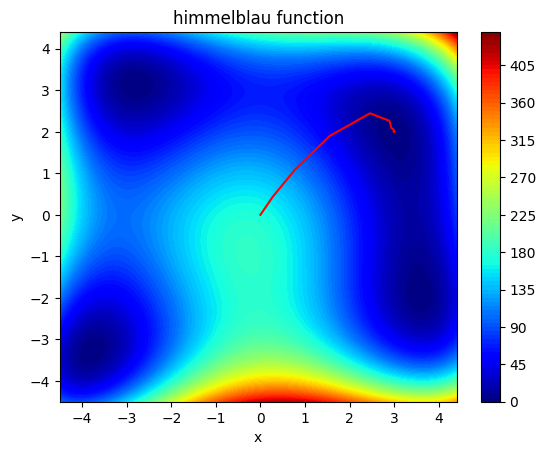

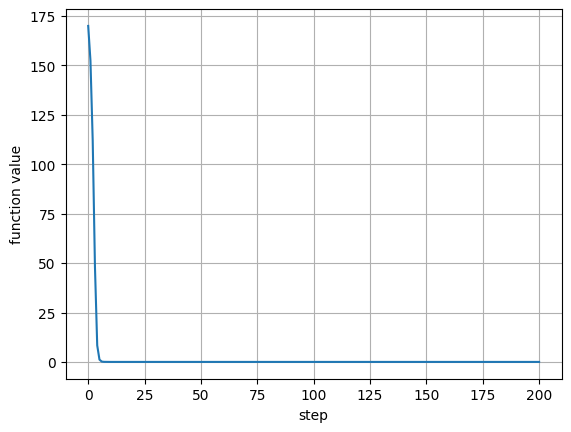

In [6]:
beta3 = 0.02
start_position = (0,0)
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

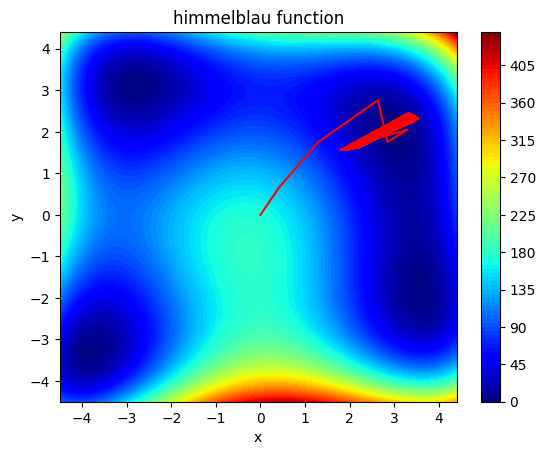

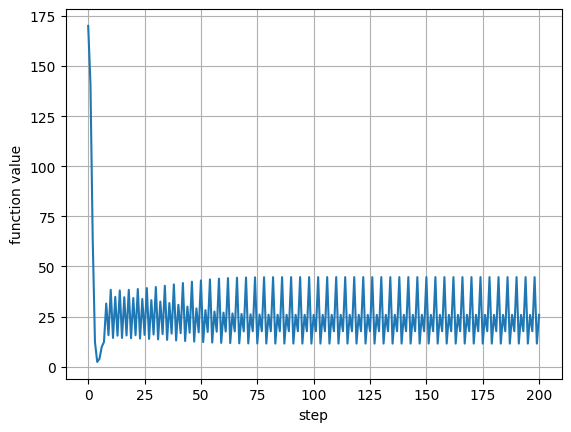

In [7]:
beta3 = 0.03
start_position = (0,0)
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

#### Punkt $(-3.2,0)

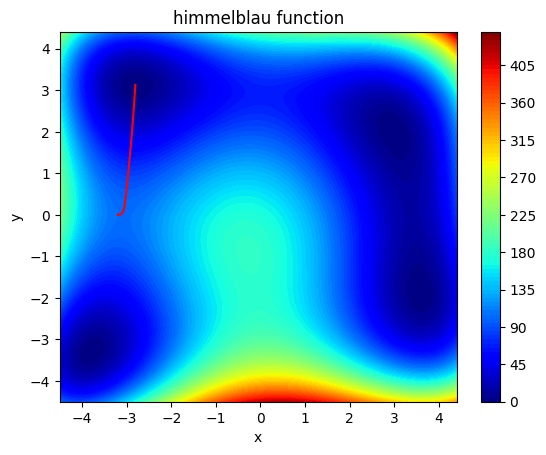

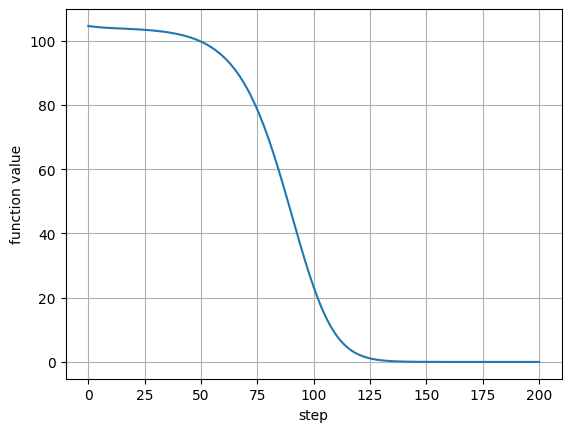

In [8]:
start_position = (-3.2,0)
beta3 = 0.001
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

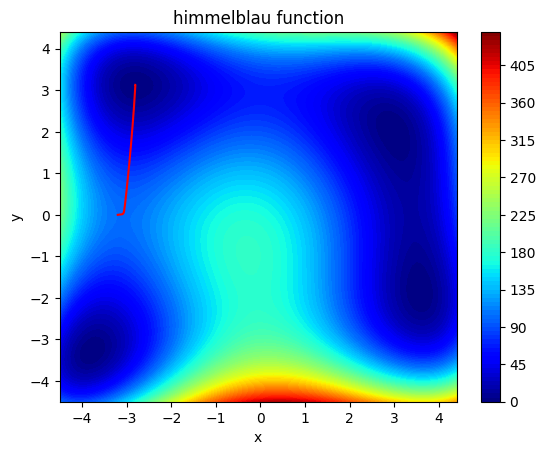

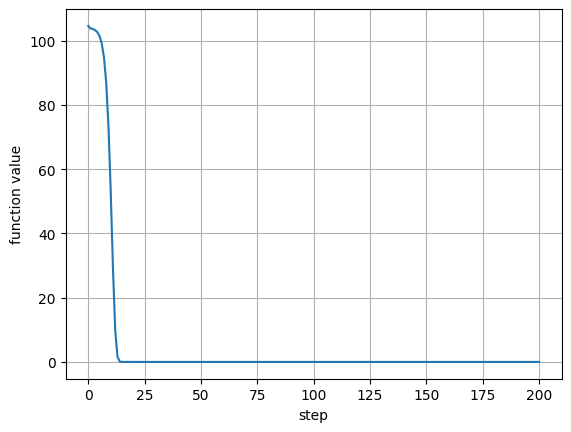

In [9]:
start_position = (-3.2,0)
beta3 = 0.01
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

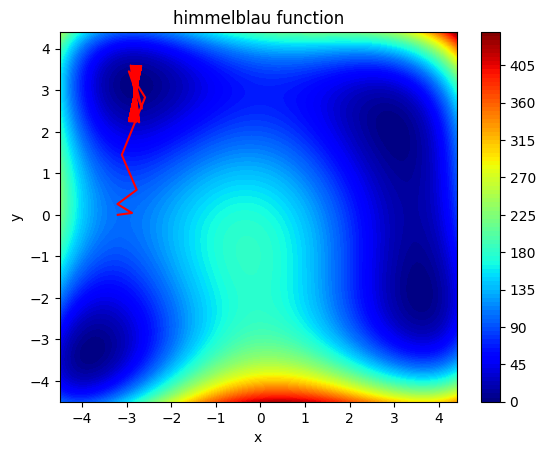

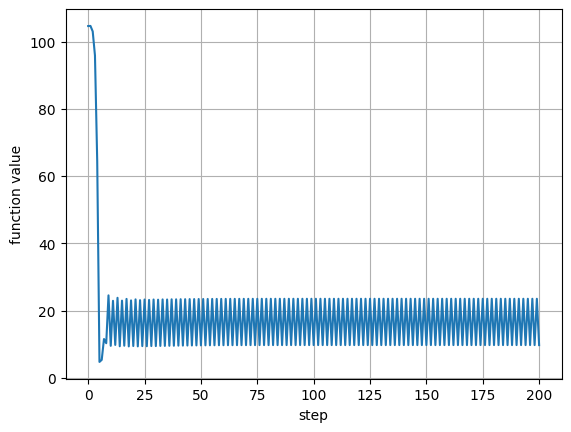

In [10]:
start_position = (-3.2,0)
beta3 = 0.03
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

#### Punkt $(0,-4)$

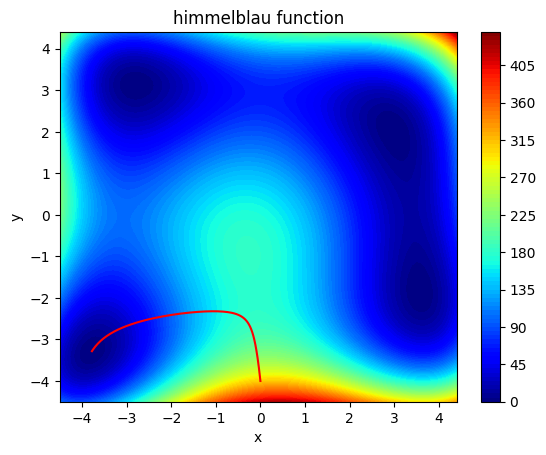

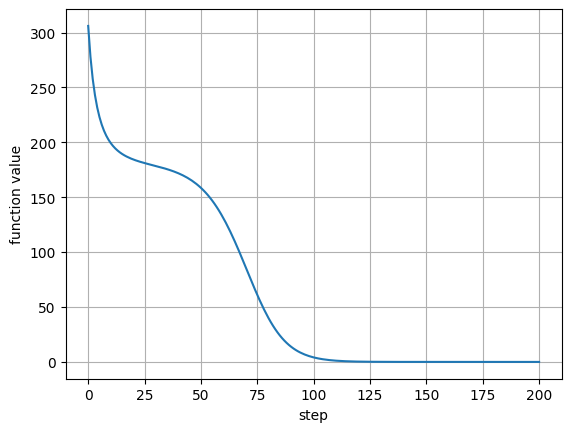

In [11]:
start_position = (0,-4)
beta3 = 0.001
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

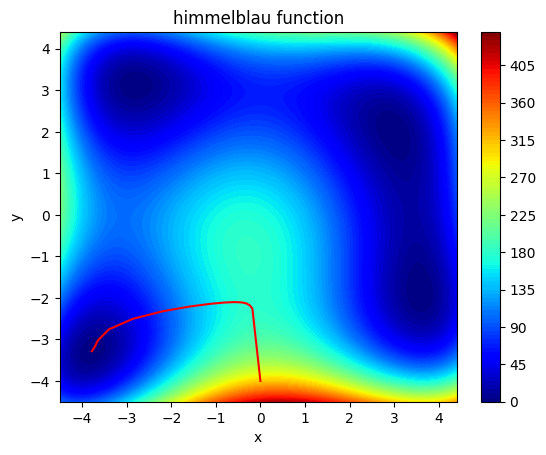

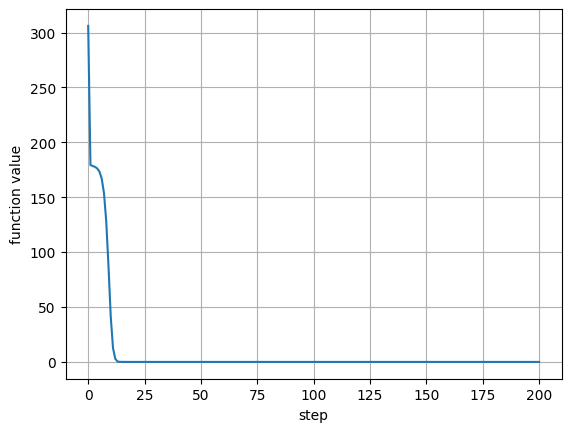

In [12]:
start_position = (0,-4)
beta3 = 0.01
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

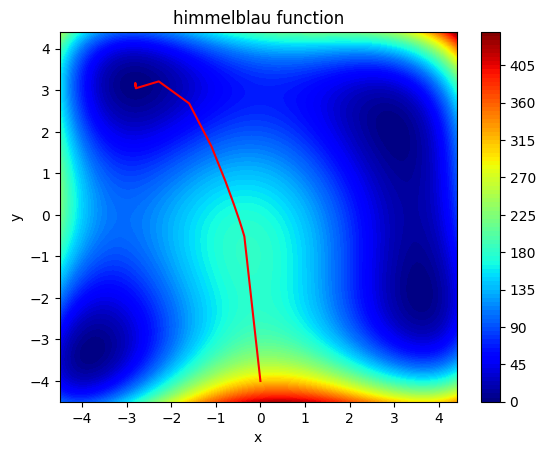

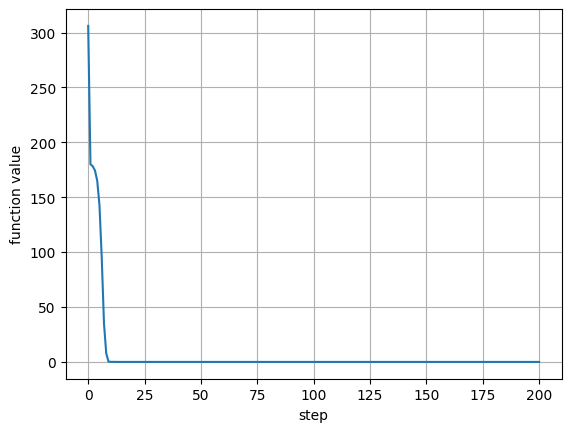

In [13]:
start_position = (0,-4)
beta3 = 0.02
trace3,values3 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta3)

plot_function(himmelblau_function,trace3)
plot_values(values3)

### Test 2, różne punkty początkowe

#### Parametr $\beta_t = 0.01$

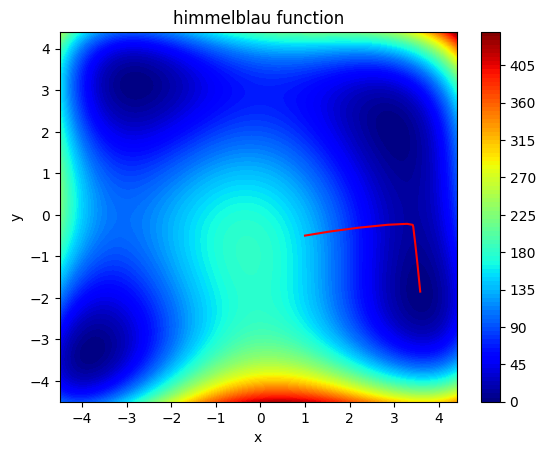

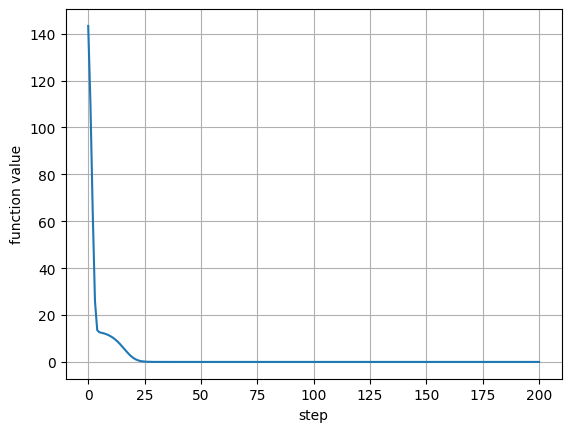

In [14]:
start_position = (1,-0.5)
beta = 0.01
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

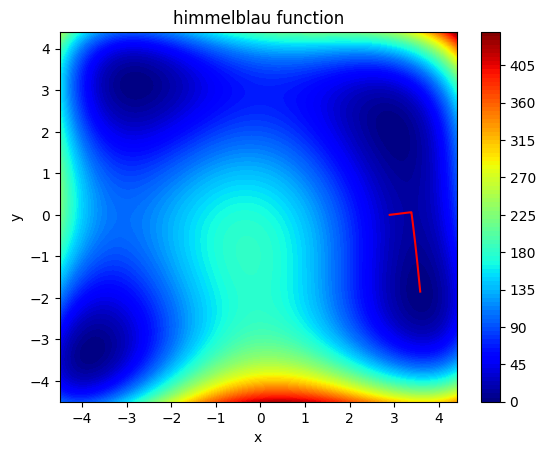

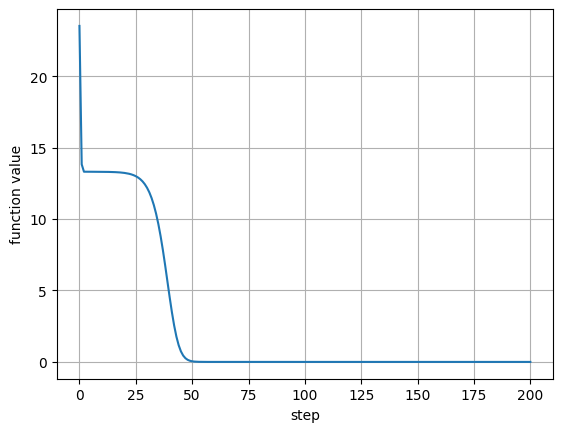

In [15]:
start_position = (2.9,0)
beta = 0.01
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

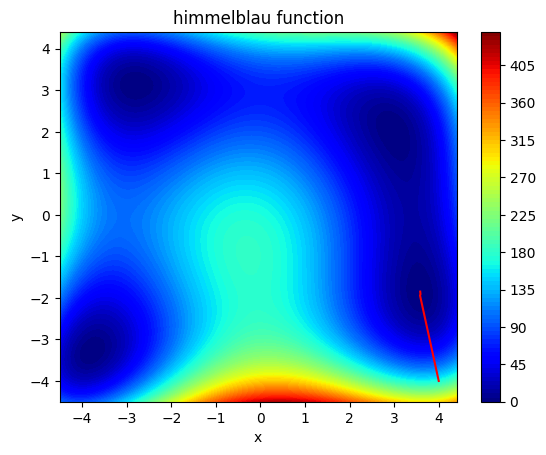

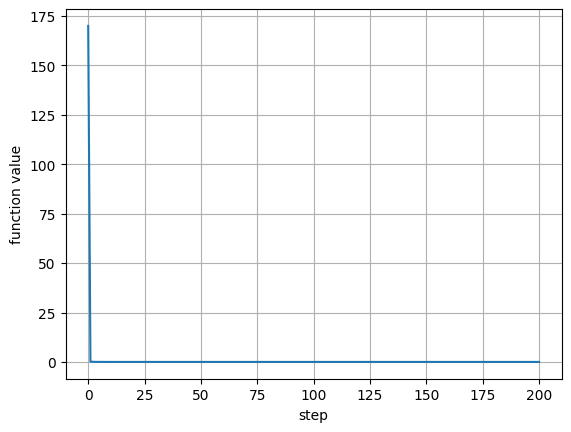

In [20]:
start_position = (4,-4)
beta = 0.01
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

#### Paramentr $\beta_t = 0.001$

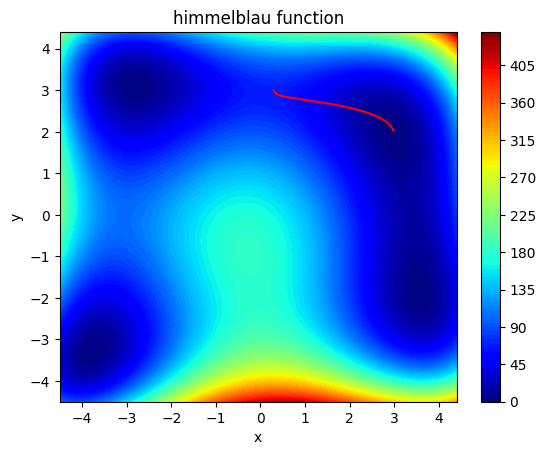

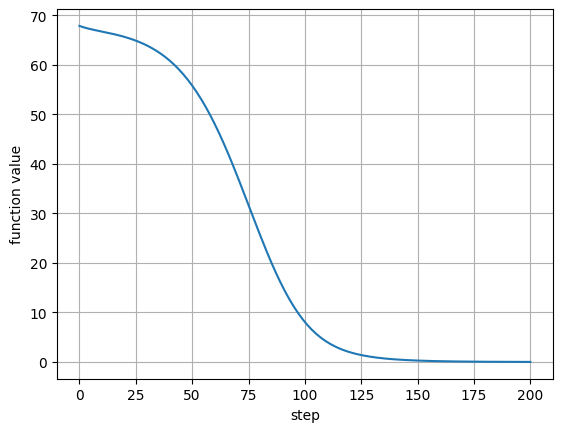

In [22]:
start_position = (0.3,3)
beta = 0.001
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

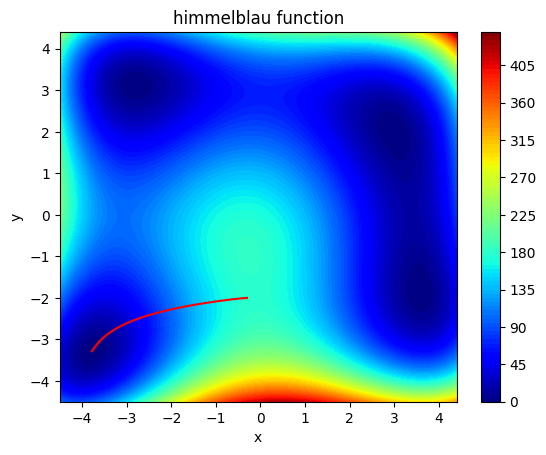

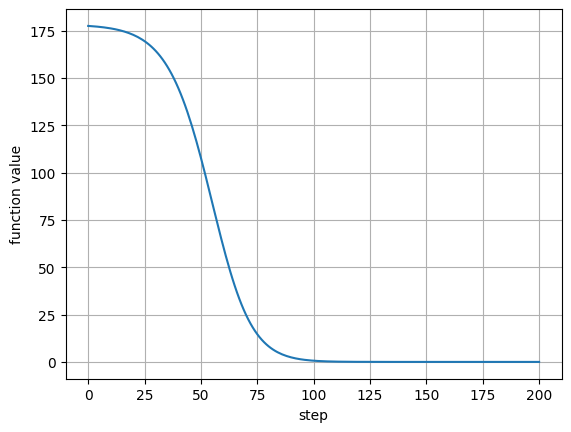

In [25]:
start_position = (-0.3,-2)
beta = 0.001
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

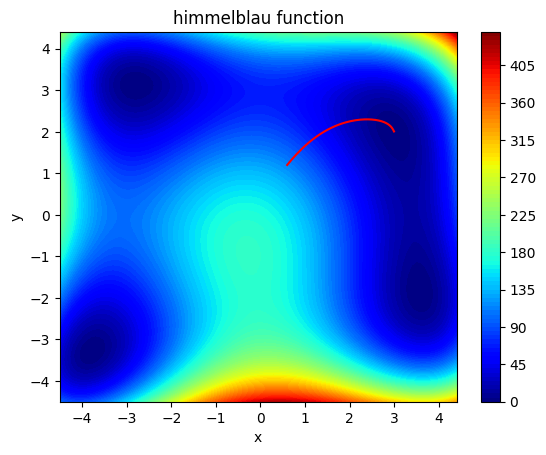

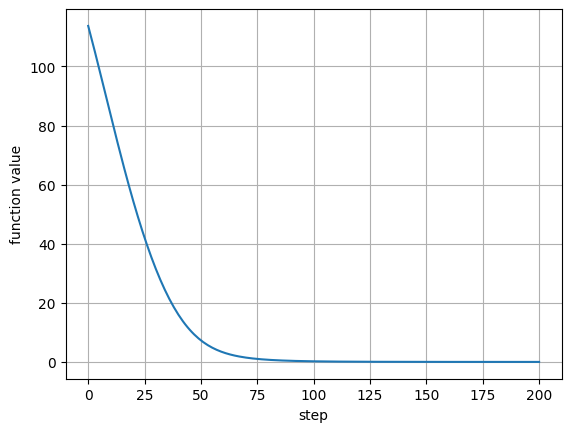

In [28]:
start_position = (0.6,1.2)
beta = 0.001
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

#### Parametr $\beta_t=0.03$

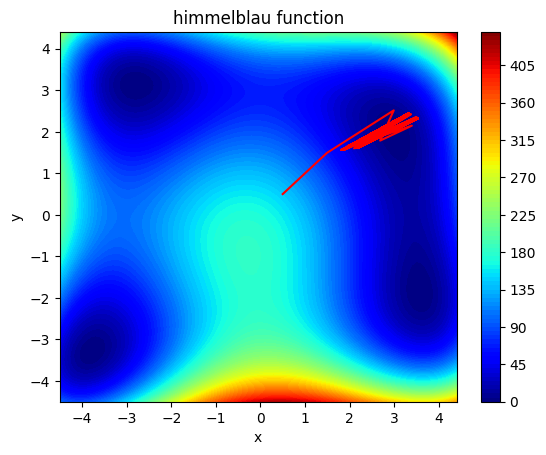

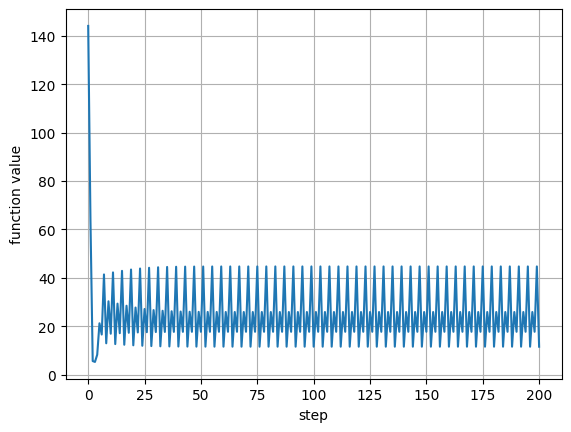

In [30]:
start_position = (0.5,0.5)
beta = 0.03
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

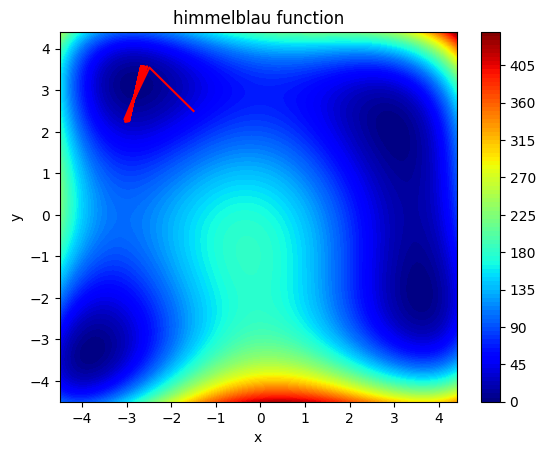

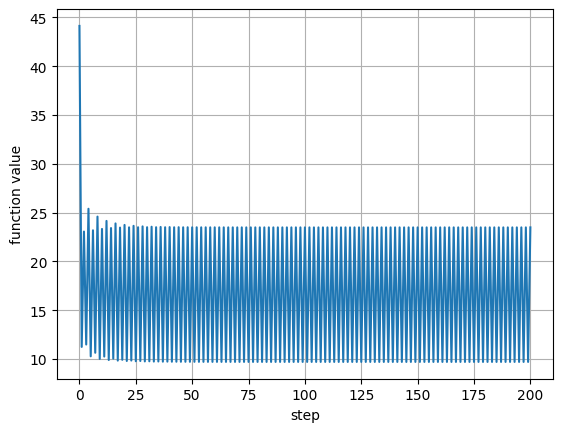

In [31]:
start_position = (-1.5,2.5)
beta = 0.03
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

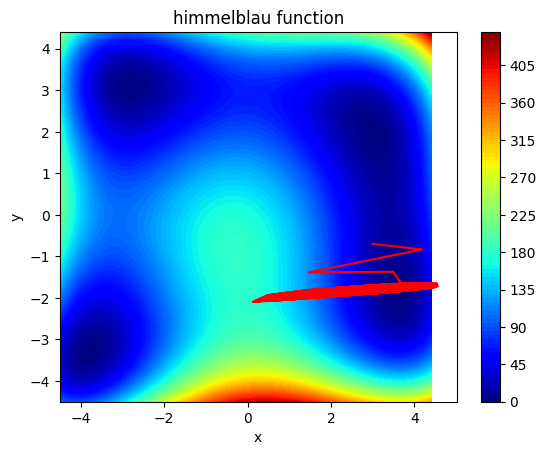

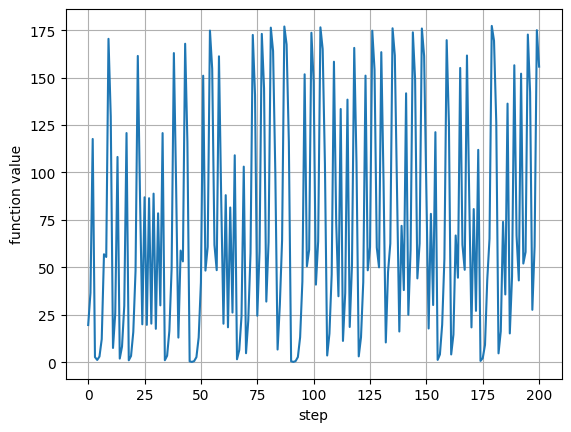

In [40]:
start_position = (3,-0.7)
beta = 0.03
trace2,values2 = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace2)
plot_values(values2)

## Funkcja Ackleya
Funkcja ta ma postać:
$$ f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2+y^2)})-\exp(0.5(\cos2\pi x+\cos2\pi y))+20+e $$
oraz jej gradient:
$$\nabla f(x,y) = \begin{bmatrix}
\frac{2^\frac{3}{2}x\exp\left( -\frac{\sqrt{x^2+y^2}}{5\sqrt{2}}\right )}{\sqrt{x^2+y^2}}+\pi\sin\left(2\pi x \right )\exp\left(\frac{\cos\left(2\pi x \right )+\cos\left(2\pi y \right )}{2} \right )
\\ 
\frac{2^\frac{3}{2}y\exp\left( -\frac{\sqrt{x^2+y^2}}{5\sqrt{2}}\right )}{\sqrt{x^2+y^2}}+\pi\sin\left(2\pi y \right )\exp\left(\frac{\cos\left(2\pi x \right )+\cos\left(2\pi y \right )}{2} \right )
\end{bmatrix}$$
Z analizy funkcji wynika, że posiada jedno minimum globalne w punkcie $(0,0)$ i mnóstwo minimów lokalnych utrudniających działanie solverów minimalizujących.

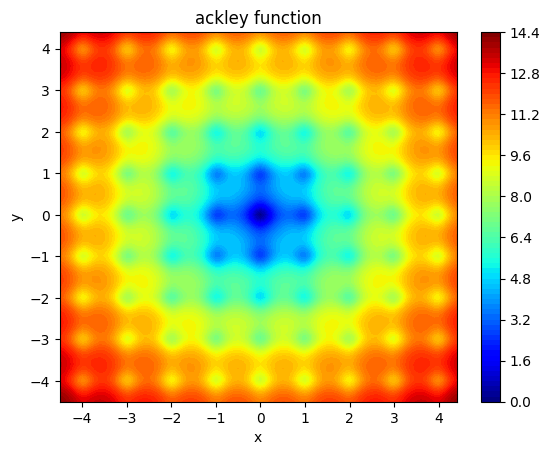

In [17]:
def ackley_function(x,y):
    elem1 = np.exp(-0.2*np.sqrt(0.5*(x**2+y**2)))
    elem2 = np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))
    return -20*elem1-elem2+20+np.e

def ackley_function_gradient(x,y):
    def elem1(a,b):
        return 2**(3/2)*a*np.exp(-0.2/np.sqrt(2)*np.sqrt(a**2+b**2)/np.sqrt(a**2+b**2))
    def elem2(a,b):
        return np.pi*np.sin(np.pi*2*a)*np.exp(0.5*(np.cos(np.pi*2*a)+np.cos(np.pi*2*b)))
    dx = elem1(x,y)+elem2(x,y)
    dy = elem1(y,x)+elem2(y,x)
    return(dx,dy)

plot_function(ackley_function)